# Exercício 7 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 1000 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9553184509277344, 6.821785643248911e-17)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/SeventhMixture1000Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0          1         2          3
0 -0.874160  -5.402393  1.233306  -3.933340
1 -6.926642   6.848709  5.164767  -2.592649
2 -1.770807   6.411575  5.220614  -5.389074
3 -0.789322  12.066171  2.673493   0.572203
4 -3.668947 -19.488036  4.326820 -10.370779


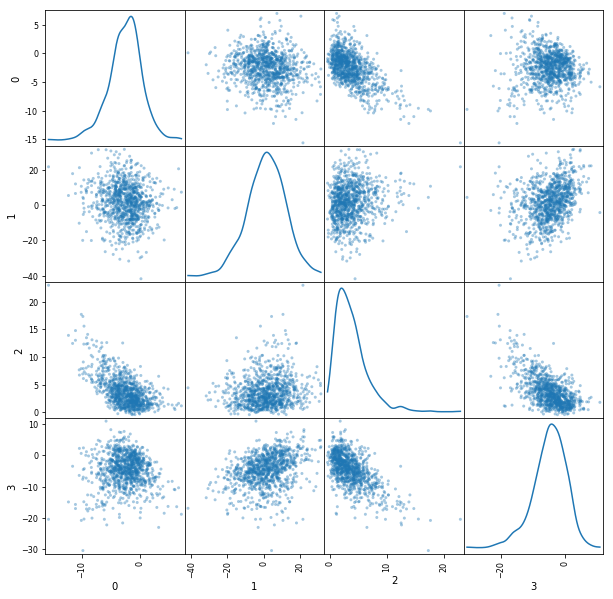

In [4]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [5]:
resultsTable(mixtures)

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.1924,0.1778,0.9876,1.8474e-07
1,-0.0062,0.6399,0.997,0.052884
2,0.5364,2.2136,0.8858,1.6169e-26
3,0.3513,0.5525,0.9773,2.1866e-11


## NPCA-RLS Algorithm

In [43]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures,runs = 100)

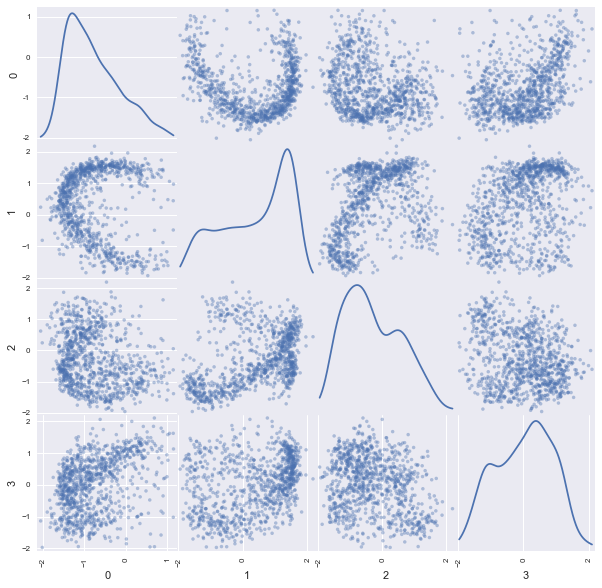

In [47]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,-0.1114,0.3218,0.9419,2.4111e-19
1,-0.4059,0.7626,0.9067,3.0188e-24
2,-0.0704,0.5401,0.9656,1.2382e-14
3,-0.1813,0.2331,0.9782,4.123e-11


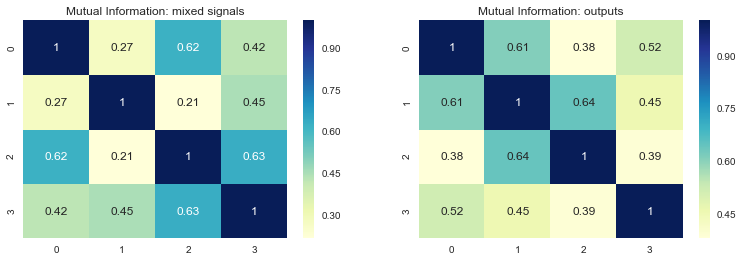

In [45]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures, y = yNPCA, KDE = True)

## Chichocki-Unbehauen Algorithm Feedback network

In [9]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, learningRate = 1e-1, decayRate = 1e-7, runs  = 100) 

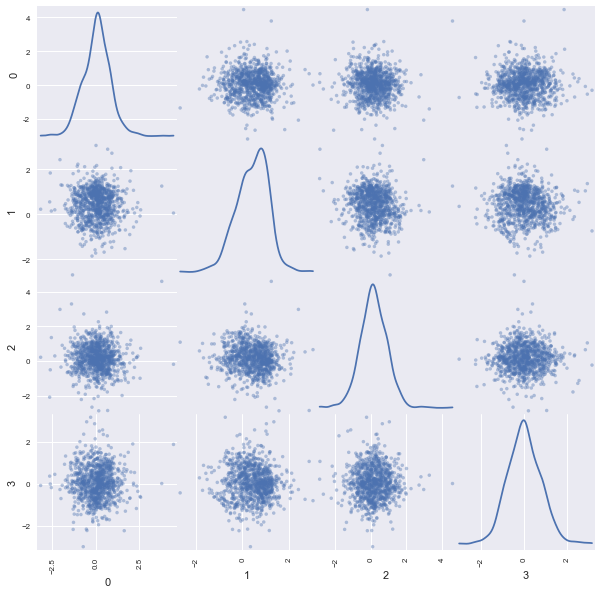

In [46]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.3746,0.4367,0.9834,2.9964e-09
1,0.3096,0.1717,0.9878,2.099e-07
2,0.3221,0.4538,0.9847,1.0274e-08
3,0.2474,0.425,0.9943,0.00075317


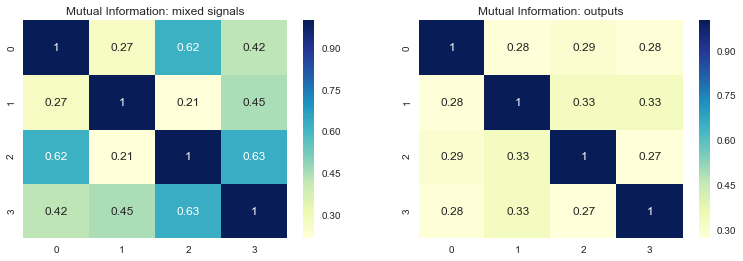

In [11]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures, y = yFeedback, KDE = True)

## Chichocki-Unbehauen Algorithm Feedforward network

In [22]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, learningRate = 1e-2, runs = 100)

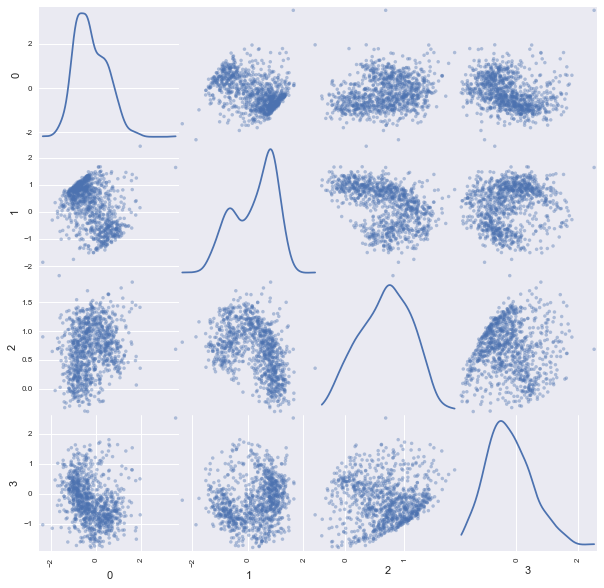

In [23]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.2847,0.4236,0.9786,5.5792e-11
1,0.0124,0.1631,0.9513,1.1168e-17
2,-0.1426,0.1281,0.989,8.3957e-07
3,0.0796,0.5289,0.9877,1.9906e-07


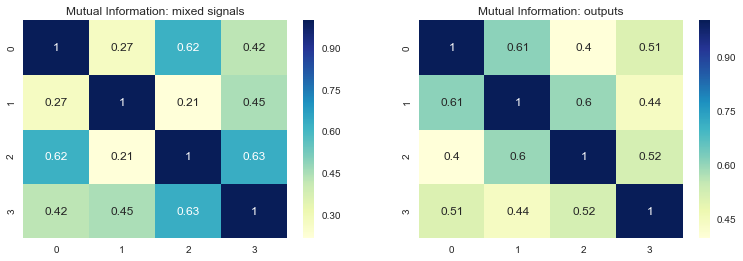

In [24]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures, y = yFeedforward, KDE = True)